In [1]:
# For data manipulation
import numpy as np 
import pandas as pd 

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Ingore the warnings
import warnings
warnings.filterwarnings('ignore')

# DL Libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import image_dataset_from_directory

# Other libraries
import os
import random


2025-11-21 13:41:15.035277: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-21 13:41:15.035450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-21 13:41:15.145898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:

import os
os.makedirs("/kaggle/working/models", exist_ok=True)
os.makedirs("/kaggle/working/results", exist_ok=True)

print("Folders created: /kaggle/working/models/ and /kaggle/working/results/")


Folders created: /kaggle/working/models/ and /kaggle/working/results/


In [3]:
# Load the image dataset from the directory using utils
# ds = image_dataset_from_directory('E:\DataScience Codanics\Kaggle\LAPTOP Items classification\PC Part Classification\Data')

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/cat-and-dog/test_set/test_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/cat-and-dog/training_set/training_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)


Found 2023 files belonging to 2 classes.
Found 8005 files belonging to 2 classes.


In [4]:
# Creating a function to visualize the images

def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(20, 4), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [5]:
# Extrating the class labels
classes = train_ds.class_names

CATS


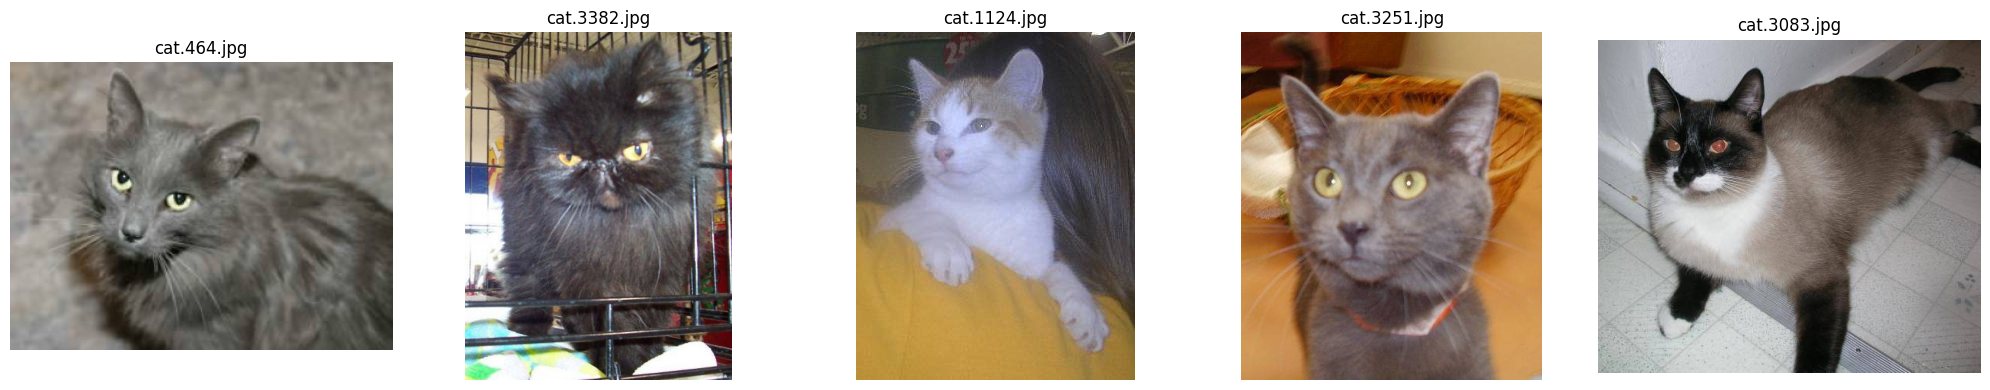

DOGS


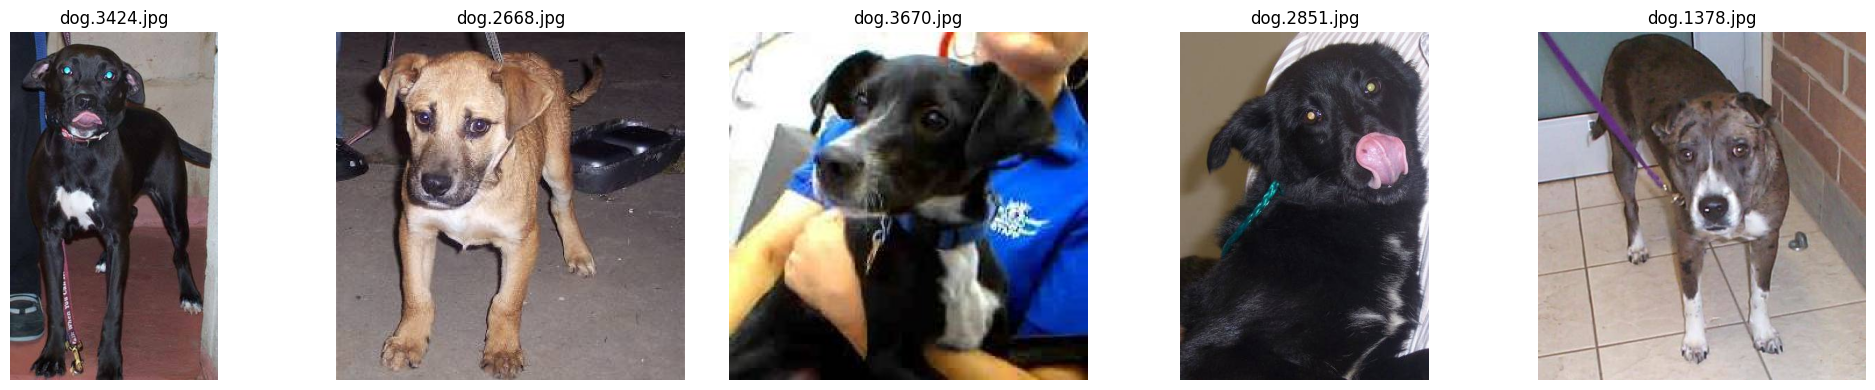

In [6]:
# Iterating through each class to plot its images
for label in classes:
    
    # Specify the path containing the images to visualize
    path_to_visualize = f"/kaggle/input/cat-and-dog/training_set/training_set/{label}"

    # Visualize 5 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=5)

In [7]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3),activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    62,980,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,066,241 (240.58 MB)

 Trainable params: 63,066,241 (240.58 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(train_ds, batch_size=32, epochs=10, validation_data=val_ds, verbose=1)

Epoch 1/10
 3/64 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.4167 - loss: 779.7818

I0000 00:00:1763732517.928419     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5024 - loss: 886.0030

W0000 00:00:1763732525.415950     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 375ms/step - accuracy: 0.5025 - loss: 881.9745 - val_accuracy: 0.5270 - val_loss: 231.9440
Epoch 2/10


W0000 00:00:1763732541.575972     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.5566 - loss: 184.2343 - val_accuracy: 0.5463 - val_loss: 97.1810
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.5236 - loss: 151.8753 - val_accuracy: 0.5307 - val_loss: 80.7146
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.5727 - loss: 97.3762 - val_accuracy: 0.5066 - val_loss: 163.6965
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.5296 - loss: 140.2290 - val_accuracy: 0.5299 - val_loss: 54.2581
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.5565 - loss: 72.9791 - val_accuracy: 0.5287 - val_loss: 46.5545
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.5623 - loss: 37.1581 - val_accuracy: 0.6090 - val_loss: 15.6315
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.5657 - loss: 28.0140 - val_accuracy: 0.5081 - val_loss: 32.0329
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.5715 - loss: 19.2920 - 

In [13]:
model.save_weights("/kaggle/working/models/model_v1.weights.h5")
print("Saved weights to /kaggle/working/models/model_v1.weights.h5")


Saved weights to /kaggle/working/models/model_v1.weights.h5


In [14]:

from sklearn.metrics import f1_score
import json

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int)

    y_true.extend(labels.numpy())
    y_pred.extend(preds.reshape(-1))

f1 = f1_score(y_true, y_pred)

metrics = {
    "train_accuracy": float(history.history['accuracy'][-1]),
    "val_accuracy": float(history.history['val_accuracy'][-1]),
    "f1_score": float(f1)
}

with open("/kaggle/working/results/metrics_v1.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("Saved metrics to /kaggle/working/results/metrics_v1.json")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

W0000 00:00:1763732728.832269     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [19]:

model_code = """
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def get_model():
    model = Sequential()
    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(256,256,3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model
"""

with open("/kaggle/working/models/model_v1.py", "w") as f:
    f.write(model_code)

print("Saved model_v1.py to /kaggle/working/models/")


Saved model_v1.py to /kaggle/working/models/


In [20]:
!zip -r model_outputs.zip /kaggle/working


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/results/ (stored 0%)
  adding: kaggle/working/results/metrics_v1.json (deflated 22%)
  adding: kaggle/working/models/ (stored 0%)
  adding: kaggle/working/models/model_v1.weights.h5 (deflated 6%)
  adding: kaggle/working/models/model_v1.py (deflated 61%)


In [23]:
from IPython.display import FileLink
FileLink('model_outputs.zip')


/kaggle/working/model_outputs.zip